<a href="https://colab.research.google.com/github/harnalashok/hadoop/blob/main/spark_streaming_by_pictures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Important**

>When running a Spark Streaming program locally, **do not use** “local” or “local[1]” as the master URL. Either of these means that only one thread will be used for running tasks locally. If you are using an input DStream based on a receiver (e.g. sockets, Kafka, etc.), then the single thread will be used to run the receiver, leaving no thread for processing the received data. Hence, when running locally, always use “local[n]” as the master URL, where n > number of receivers to run (see Spark Properties for information on how to set the mast

Datastreaming applications make it easy to collect, process, and analyze real-time, streaming data so you can get timely insights and react quickly to new information. They offer key capabilities to cost-effectively process streaming data at any scale, along with the flexibility to choose the tools that best suit the requirements of your application. One can ingest real-time data such as video, audio, application logs, website clickstreams, and IoT telemetry data for machine learning, analytics, and other applications. These enable you to process and analyze data as it arrives and respond instantly instead of having to wait until all your data is collected before the processing can begin.


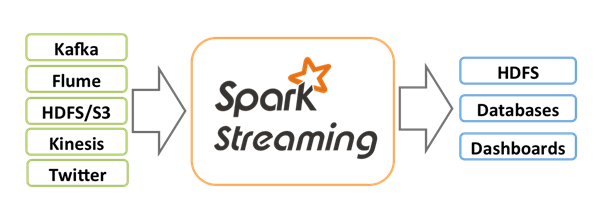

<b>DStreams</b>

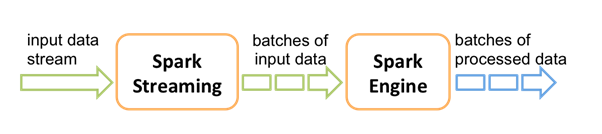

Spark Streaming provides a high-level abstraction called discretized stream or DStream, which represents a continuous stream of data. DStreams can be created either from input data streams from sources such as Kafka, and Kinesis, or by applying high-level operations on other DStreams. Internally, a DStream is represented as a sequence of RDDs.

**Spark Streaming Context** <br>
SSC is the Entry point for all spark streaming operations. This object must be created before any streaming is to begin.

DStream: <br>It is a high level Discretized Streaming abstraction.

<b>Stream Processing steps</b>

After a Streaming context is defined, 
After a context is defined, further steps are:

> **Define** the input sources by creating input DStreams.<br>
> **Define** the streaming computations by applying transformation and output operations to DStreams.<br>
> **Start** receiving data and processing it using streamingContext.start().<br>
>**Wait** for the processing to be stopped (manually or due to any error) using streamingContext.awaitTermination().<br>
> The processing can be manually stopped using streamingContext.stop().


 <b>DStream Internally:</b>  
 A DStream is represented by a continuous series of RDDs, which is Spark’s abstraction of an immutable, distributed dataset 

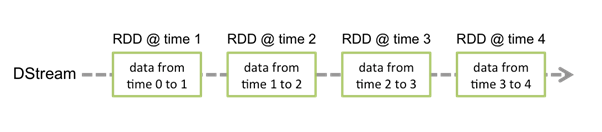

<b>Operations on DStreams</b><br>
Any operation applied on a DStream translates to operations on the underlying RDDs. For example, in the earlier example of converting a stream of lines to words, the flatMap operation is applied on each RDD in the lines DStream to generate the RDDs of the words DStream.

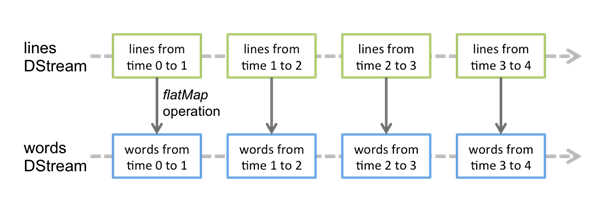

**Receiver**  
Every input DStream (except file stream) is associated with a **Receiver** object which receives the data from a source and stores it in Spark’s memory for processing

**Data Sources:**<br>
Spark Streaming provides two categories of built-in streaming sources.
> Basic sources: Sources directly available in the StreamingContext API. Examples: file systems, and socket connections.<br>
> Advanced sources: Sources like Kafka, Kinesis, etc. are available through extra utility classes. These require linking against extra dependencies.


**How Directories are Monitored**

Spark Streaming will monitor the directory dataDirectory and process any files created in that directory.

> A simple directory can be monitored, such as "hdfs://namenode:8040/logs/". All files directly under such a path will be processed as they are discovered.
> A POSIX glob pattern can be supplied, such as "hdfs://namenode:8040/logs/2017/*". Here, the DStream will consist of all files in the directories matching the pattern. That is: it is a pattern of directories, not of files in directories.<br>
>All files must be in the same data format.<br>
>A file is considered part of a time period based on **its modification time**, not its creation time.<br>
>Once processed, changes to a file within the current window will not cause the file to be reread. That is: **updates to file are ignored**.<br>
> The more files under a directory, the longer it will take to scan for changes — even if no files have been modified.

**Receiver Reliability**

There can be two kinds of data sources based on their reliability. Sources (like Kafka) allow the transferred data to be acknowledged. If the system receiving data from these reliable sources acknowledges the received data correctly, it can be ensured that no data will be lost due to any kind of failure. This leads to two kinds of receivers:

> Reliable Receiver - A reliable receiver correctly sends acknowledgment to a reliable source when the data has been received and stored in Spark with replication.<br>
> Unreliable Receiver - An unreliable receiver does not send acknowledgment to a source. This can be used for sources that do not support acknowledgment, or even for reliable sources when one does not want or need to go into the complexity of acknowldgement.

Data Dtream as an un-bounded table

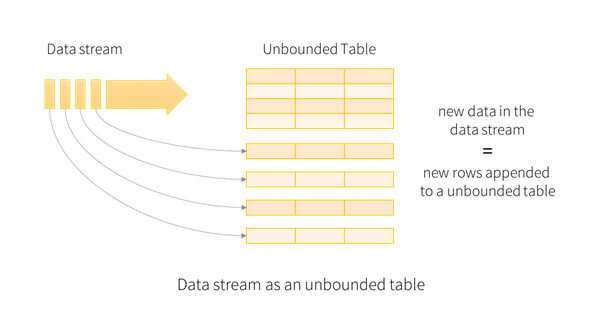

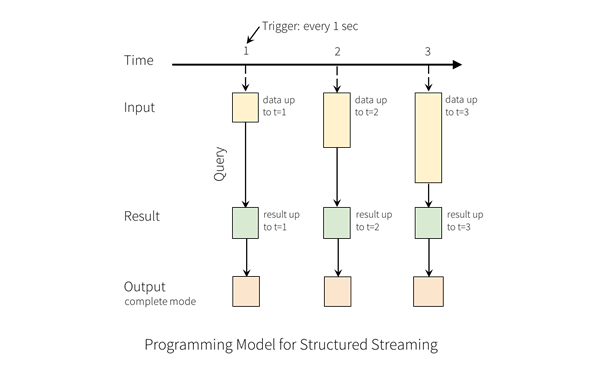

**Output modes**

The “Output” is defined as what gets written out to the external storage. The output can be defined in a different mode:

>Complete Mode - The entire updated Result Table will be written to the external storage. It is up to the storage connector to decide how to handle writing of the entire table.

> Append Mode - Only the new rows appended in the Result Table since the last trigger will be written to the external storage. This is applicable only on the queries where existing rows in the Result Table are not expected to change.

>Update Mode - Only the rows that were updated in the Result Table since the last trigger will be written to the external storage. Note that this is different from the Complete Mode in that this mode only outputs the rows that have changed since the last trigger. If the query doesn’t contain aggregations, it will be equivalent to Append mode.

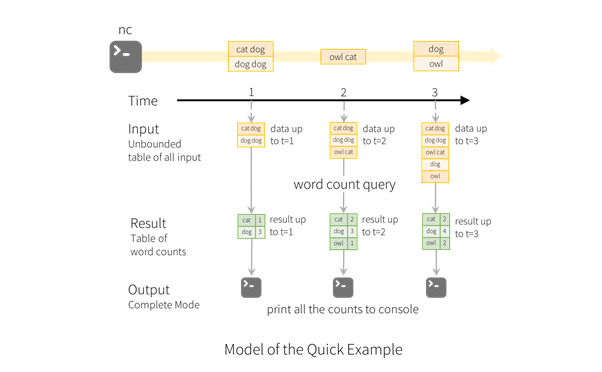

**Window operations**

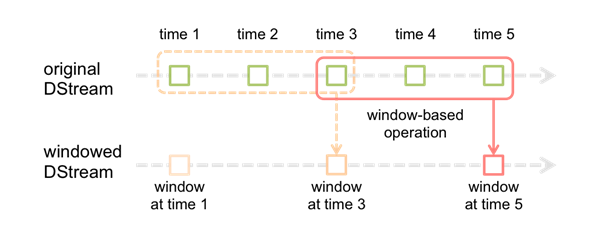

As shown in the figure, every time the window slides over a source DStream, the source RDDs that fall within the window are combined and operated upon to produce the RDDs of the windowed DStream. In this specific case, the operation is applied over the last 3 time units of data, and slides by 2 time units. This shows that any window operation needs to specify two parameters.

>window length - The duration of the window (3 in the figure).<br>
>sliding interval - The interval at which the window operation is performed (2 in the figure).


<b>Other points to remember:</b><br>
DStreams are executed lazily by the output operations, just like RDDs are lazily executed by RDD actions. Specifically, RDD actions inside the DStream output operations force the processing of the received data. Hence, if your application does not have any output operation then nothing will get executed. The system will simply receive the data and discard it.